In [1]:
# CELL1 – 1 mark


################################################################################################################################
#  libraries needed for the coursework
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
################################################################################################################################
hdf = pd.read_table('2017Health.txt', index_col=['County'])
hdf = hdf[['Years of Potential Life Lost Rate', 'Teen Birth Rate', 'Violent Crime Rate', 'Percentage Smokers']]
hdf





Populating the interactive namespace from numpy and matplotlib


,Years of Potential Life Lost Rate,Teen Birth Rate,Violent Crime Rate,Percentage Smokers
County,,,,
Alachua,6633,19,579,16
Baker,8270,58,360,19
Bay,9168,50,508,18
Bradford,10346,61,461,18
Brevard,7722,25,518,16
...,...,...,...,...
Taylor,7875,64,743,18
Volusia,8295,32,426,16
Wakulla,7548,31,272,17


In [2]:
# CELL2 – 5 marks
psd = hdf['Percentage Smokers'].values

PS = hdf['Percentage Smokers'].values
PS_mean = mean(PS)
PS_error = 1.96*std(PS)/sqrt(len(PS))

print('Mean of smokers =', round(mean(psd),2))
print('Minimum of percentage smokers =', round(min(psd),2))
print('Maximum of percentage smokers =', round(max(psd),2))
print('Standard deviation of percentage smokers =', round(std(psd),2))
print('95% confidence interval of percentage smokers =', [round((PS_mean - PS_error),2), round((PS_mean + PS_error),2)])





Mean of smokers = 16.92
Minimum of percentage smokers = 11
Maximum of percentage smokers = 21
Standard deviation of percentage smokers = 2.37
95% confidence interval of percentage smokers = [16.35, 17.5]


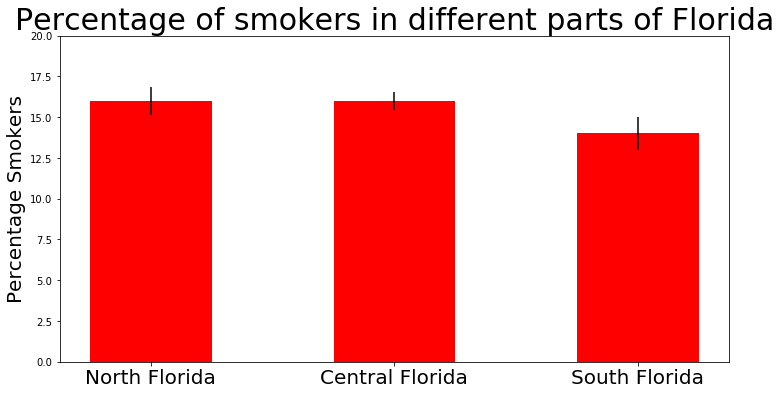

In [3]:
# CELL3 – 6 marks
#define different regions
smokers = hdf['Percentage Smokers']
NF = [smokers['Duval'], smokers['Alachua'], smokers['Leon'], smokers['Flagler'], smokers['Marion']]
CF = [smokers['Orange'], smokers['Polk'], smokers['Hillsborough'], smokers['Pinellas'], smokers['Brevard']]
SF = [smokers['Miami-Dade'], smokers['Broward'], smokers['Lee'], smokers['Palm Beach'], smokers['Sarasota']]

#calculate means
NF_mean = round(mean(NF))
CF_mean = round(mean(CF))
SF_mean = round(mean(SF))

#calculate errors
NF_error = 1.96*std(NF)/sqrt(len(NF))
CF_error = 1.96*std(CF)/sqrt(len(CF))
SF_error = 1.96*std(SF)/sqrt(len(SF))

#draw figure
figure(figsize(12,6))
N = 3
ind = arange(N)
width = 0.5
bar(ind, [NF_mean, CF_mean, SF_mean], width, color='r', yerr=[NF_error, CF_error, SF_error] )
ylabel('Percentage Smokers', fontsize=20)
xtickloc = ind
xticklabel = ['North Florida', 'Central Florida', 'South Florida']
xticks(xtickloc, xticklabel, rotation='horizontal', fontsize=20)
title('Percentage of smokers in different parts of Florida', fontsize=30)
ylim([0, 20])
show()



In [4]:
# CELL4 – 2 marks
import statsmodels.api as sm

ypll = hdf["Years of Potential Life Lost Rate"].values 
comb = hdf[["Teen Birth Rate", "Percentage Smokers"]]
comb = sm.add_constant(comb)
results = sm.OLS(ypll, comb).fit()
print("YPLL = ", round(results.params[1],2), "* Teen Birth Rate +", round(results.params[2],2), "* Percentage Smokers +", round(results.params[0],2))




YPLL =  36.09 * Teen Birth Rate + 225.19 * Percentage Smokers + 2503.14


c:\users\hmbat\.virtualenvs\cm2105-_dpv-oekrzhju\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [5]:
# CELL5 – 6 marks
VCR = hdf['Violent Crime Rate']
YPLLR = hdf['Years of Potential Life Lost Rate']
Teen_Birth_Rate = hdf['Teen Birth Rate']
Model_A = 60.6*Teen_Birth_Rate + 5297.6
Model_B = 1.36*VCR + 7254.3

Error_A = abs(YPLLR - Model_A)
Error_B = abs(YPLLR - Model_B)
print('Mean Absolute Error of Model A =',round(mean(abs(Error_A)),2))
print('Mean Absolute Error of Model B =',round(mean(abs(Error_B)),2))
print('Model A normality test:', stats.shapiro(Model_A)[1]>0.05)
print('Model B normality test:', stats.shapiro(Model_B)[1]>0.05)
print('Differnece in Mean:', round(mean(Model_A)-mean(Model_B)),2)
print('Significance test:', stats.mannwhitneyu(Error_A,Error_B, alternative='two-sided'))
print('Statistical Significant Differennce Test: Are they signifacnt?', stats.mannwhitneyu(Error_A, Error_B, alternative='two-sided')[1]<0.05)
print('Model A has a smaller mean absolute error which is better, but, as seen in the mann whitneyu test, there is statisticly significant difference between the two models.')


Mean Absolute Error of Model A = 948.45
Mean Absolute Error of Model B = 1219.42
Model A normality test: True
Model B normality test: False
Differnece in Mean: 1.0 2
Significance test: MannwhitneyuResult(statistic=1751.0, pvalue=0.05225048924803222)
Statistical Significant Differennce Test: Are they signifacnt? False
Model A has a smaller mean absolute error which is better, but, as seen in the mann whitneyu test, there is statisticly significant difference between the two models.
